In [2]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

# This function is just the code snippet provided in the pdf
# I just made it into a function for later use
def generate_sample_data(noise_scale, number_of_samples):
    x = 30*(np.random.rand(number_of_samples, 1) - 0.5)
    y = 6 * x + 7 * x**2 + 3 * x**3 + noise_scale*np.random.randn(number_of_samples, 1)
    return [x,y]

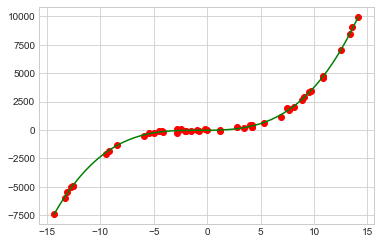

In [3]:
## 2.1
## Plot noisy data and polynomial approximation over it
def gen_polynomial(x,y,order):
    z = np.polyfit(x[:,0], y[:,0], order)
    return np.poly1d(z)

x, y = generate_sample_data(noise_scale = 100,
                            number_of_samples = 50)

trend = gen_polynomial(x,y,3)
step_vec = np.linspace(min(x),max(x))
plt.plot(x,y,'ro')
plt.plot(step_vec, trend(step_vec), color="green")

A polynomial fit is generated using the [`numpy.polyfit()`](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) method, which returns an array of coefficients. Then, [`np.poly1d`](https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html#numpy.poly1d) is called to make polynomial operations more convenient. Finally, a linear vector is generated so that the polynomial can be plotted over the span of the generated random data. The minimum and maximum of the `x` array are used so the polynomial lays nicely over the test data.

Order 3 was chosen somewhat arbitrarily, mostly since the raw data trend looked like a 3rd order polynomial.

Text(0, 0.5, 'MSE')

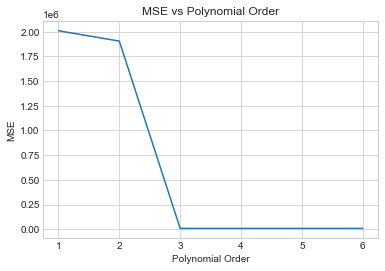

In [4]:
## 2.2
## Compute MSE for orders m = 1,2,3,4,5,6

def find_mse(x,y,order):
    poly_function = gen_polynomial(x,y,order)
    poly_array = poly_function(x[:,0])
    return np.square(np.subtract(y[:,0], poly_array)).mean()
   
highest_order = 6
order_array = np.linspace(1,highest_order, highest_order)
mse_array = []

for order in order_array:
    mse_array.append(find_mse(x,y,order))
    
plt.plot(order_array, mse_array)
plt.title("MSE vs Polynomial Order")
plt.xlabel("Polynomial Order")
plt.ylabel("MSE")

Since orders 3 - 6 give similar MSE values, we should select order 3, since it is less computationally expensive than the higher order polynomials and has a lower chance for overfitting.

Text(0, 0.5, 'MSE')

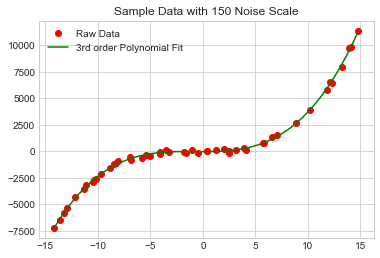

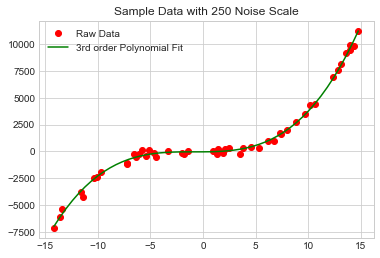

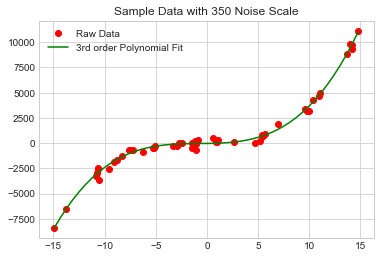

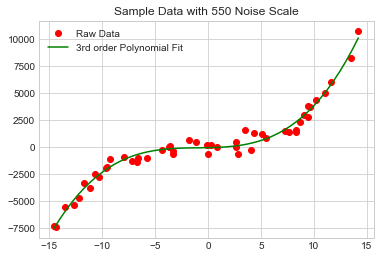

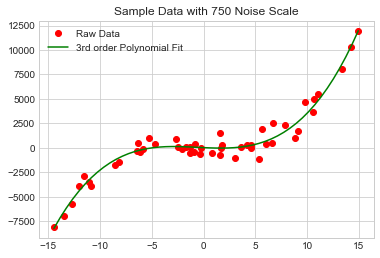

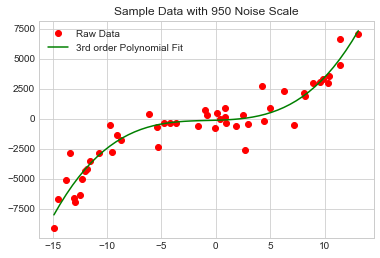

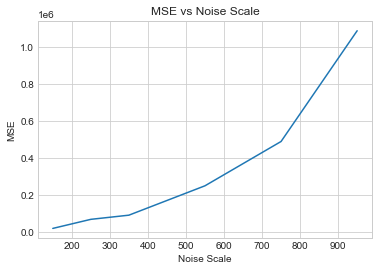

In [13]:
## 2.3
## Change noise_scale with m = 3 found in 2.2
noise_vec = [150, 250, 350, 550, 750, 950]
mse_array = []
POLY_ORDER = 3

for noise_scale in noise_vec:
    x,y = generate_sample_data(noise_scale, 50)
    poly_function = gen_polynomial(x,y,POLY_ORDER)
    mse_array.append(find_mse(x,y,POLY_ORDER))
    # Make a new figure for each pass, use NS as handle
    plt.figure(noise_scale)
    plt.plot(x[:,0], 
             y[:,0], 
             "ro", 
             label="Raw Data")
    step_vec = np.linspace(min(x),max(x))
    plt.plot(step_vec, 
             poly_function(step_vec), 
             color="green", 
             label="Polynomial Fit of Order {}".format(POLY_ORDER))
    plt.title("Sample Data with {} Noise Scale".format(noise_scale))
    plt.legend()

# Plot the MSE values
plt.figure(0)
plt.plot(noise_vec, mse_array)
plt.title("MSE vs Noise Scale")
plt.xlabel("Noise Scale")
plt.ylabel("MSE")

As shown by the *MSE vs Noise Scale* graph, as the noise scale increases, the error also increases. This means that the more noisy the training data, the worse the generated model.

Text(0, 0.5, 'MSE')

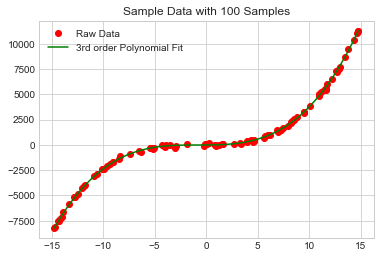

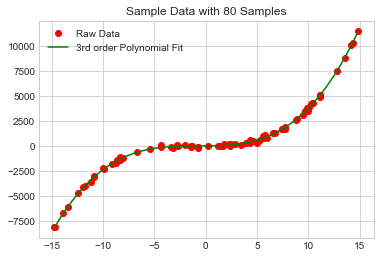

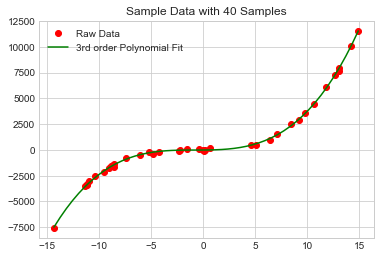

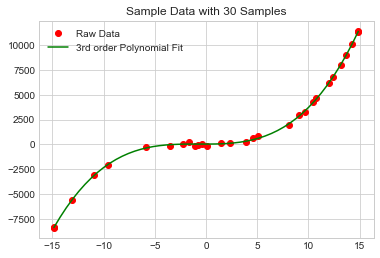

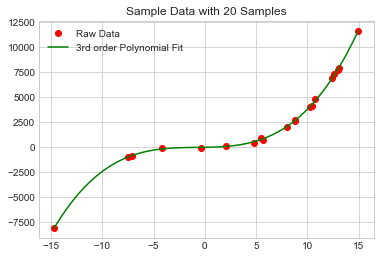

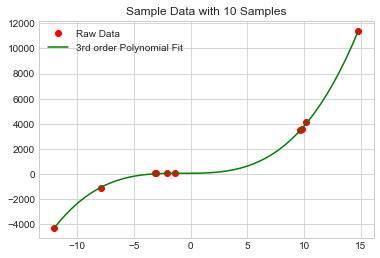

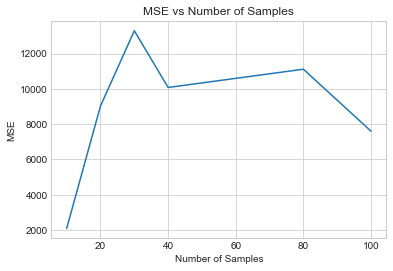

In [11]:
## 2.4
## Change noise_scale with m = 3 found in 2.2
sample_vec = [100, 80, 40, 30, 20, 10]
mse_array = []
POLY_ORDER = 6

for sample_num in sample_vec:
    x,y = generate_sample_data(100, sample_num)
    poly_function = gen_polynomial(x,y,POLY_ORDER)
    mse_array.append(find_mse(x,y,POLY_ORDER))
    # Make a new figure for each pass, use sample_num as handle
    plt.figure(sample_num)
    plt.plot(x[:,0], 
             y[:,0], 
             "ro", 
             label="Raw Data")
    step_vec = np.linspace(min(x),max(x))
    plt.plot(step_vec, 
             poly_function(step_vec), 
             color="green", 
             label="Polynomial Fit of Order {}".format(POLY_ORDER))
    plt.title("Sample Data with {} Samples".format(sample_num))
    plt.legend()

# Plot the MSE values
plt.figure(0)
plt.plot(sample_vec, mse_array)
plt.title("MSE vs Number of Samples")
plt.xlabel("Number of Samples")
plt.ylabel("MSE")

Generally, as shown by *MSE vs Number of Samples*, the error *tends* to decrease as the number of samples increases. However this is not always the case. Unlike in *MSE vs Noise Scale*, the MSE does not always decrease as more samples are added into the model. This is largely because, even though there are more samples, these samples may not always be high-quality, and can actually degrade the model rather than improve it.